# Quiz: lagrange multiplier

/home/laurent/workspaces/mooke/datasciences/mathematics/math_env/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Javascript object>


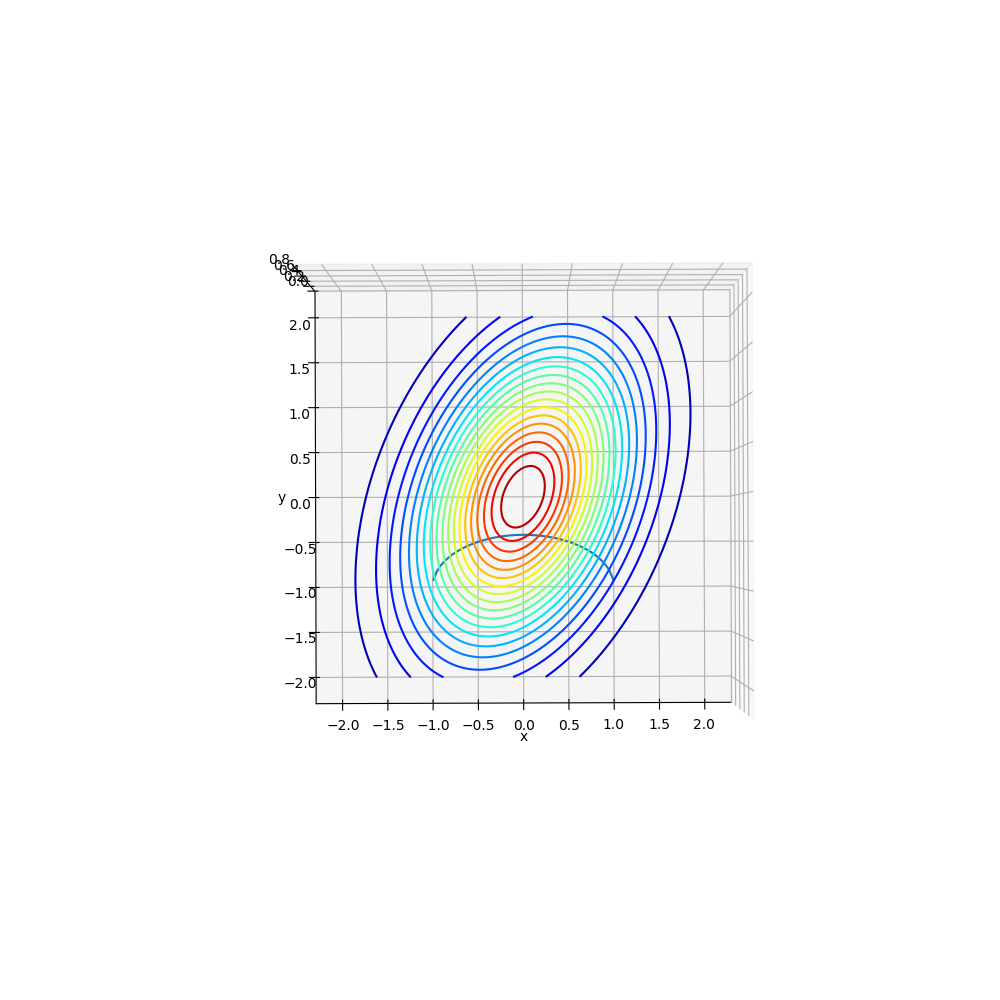

In [64]:
%run lib/drawing.py

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

# First we define the functions,
def f (x, y) :
    return np.exp(-(2*x*x + y*y - x*y) / 2)

def g (x, y) :
    return x*x + 3*(y+1)**2 - 1

def g_y(x) :
    return np.sqrt(1-x**2) / np.sqrt(3) - 1

# get the points 
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

# populate the whole grid 
X, Y = np.meshgrid(x, y)
Z_f = f(X, Y)
Z_g = g(X, Y)
ys = g_y(x)

# plotting the results
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

# drawing the function
#ax.plot_surface(X, Y, Z_f, cmap=cm.binary)
ax.plot(x, ys)
ax.set_xlabel("x")
ax.set_ylabel("y")
cset = ax.contour(X, Y, Z_f, zdir='z', levels=20, offset=0, cmap=cm.jet)

plt.show()

In [65]:
import numpy as np



# Next their derivatives,
def dfdx (x, y) :
    return 1/2 * (-4*x + y) * f(x, y)

def dfdy (x, y) :
    return 1/2 * (x - 2*y) * f(x, y)

def dgdx (x, y) :
    return 2 * x

def dgdy (x, y) :
    return 6 * y + 6

from scipy import optimize

def DL (xyλ) :
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])




In [67]:
from scipy import optimize
import pandas as pd

def DL (xyλ) :
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

results = []
p_x = -2
while p_x < 2:
    p_y = -2
    while p_y < 2:
        (x0, y0, λ0) = (p_x, p_y, 0)
        x, y, λ = optimize.root(DL, [x0, y0, λ0]).x
        results.append({'x0':np.round(x0,3), 'y0':np.round(y0,3), 'x':np.round(x,3), 'y':np.round(y,3), 'f(x,y)':np.round(f(x, y),3), 'g(x,y)':np.round(g(x, y),3)})
        p_y += 0.1
    p_x += 0.1
    
df_results = pd.DataFrame(results)
print(df_results["f(x,y)"].nunique())
print(df_results[df_results['g(x,y)'] == 0]["f(x,y)"].unique())
print(df_results[df_results['g(x,y)'] == 0]["f(x,y)"].size)
gb = df_results[df_results['g(x,y)'] == 0].groupby(['x', 'y', 'f(x,y)']).max()
print(gb)



45
[0.372 0.354 0.115 0.924]
1539
                       x0   y0  g(x,y)
x      y      f(x,y)                  
-0.959 -1.164 0.354   1.4  1.9    -0.0
-0.626 -1.450 0.372   1.2  1.9     0.0
-0.096 -0.425 0.924   1.7  1.9     0.0
 0.931 -1.211 0.115   1.9  1.9     0.0


x = -0.958963
y = -1.1637
λ = -0.246538
f(x, y) = 0.353902
g(x, y) = 0


/home/laurent/workspaces/mooke/datasciences/mathematics/math_env/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


<Figure size 432x288 with 0 Axes>

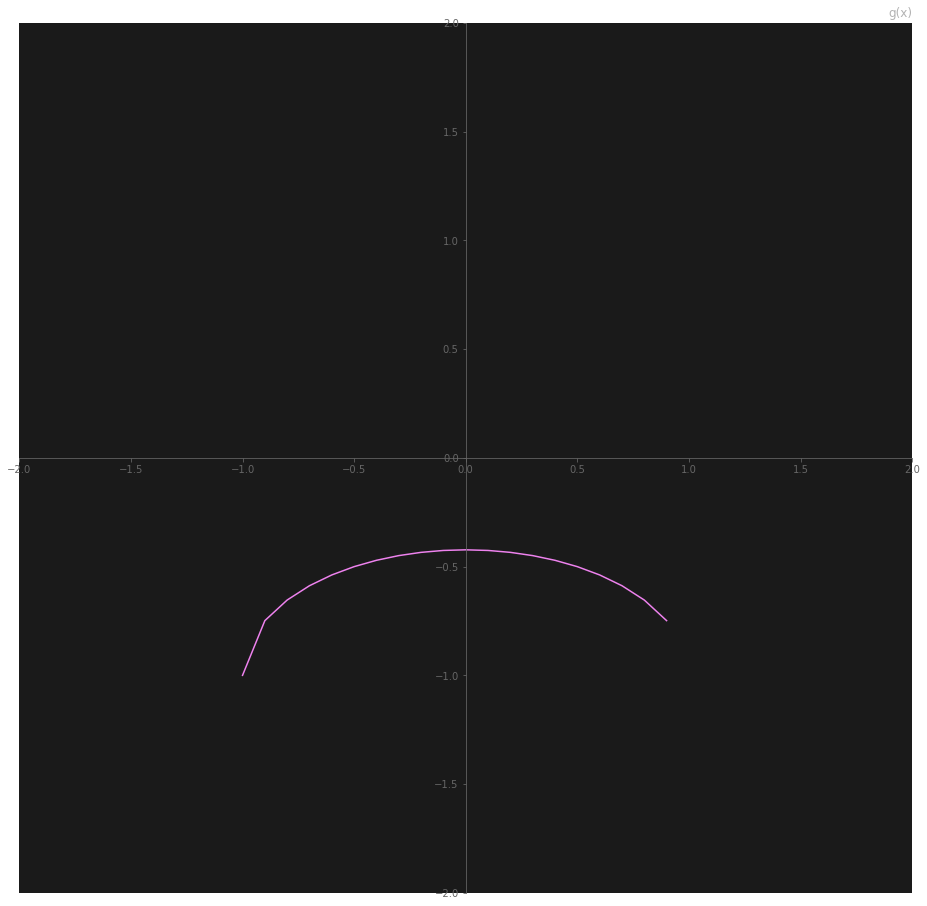

In [52]:
%run lib/drawing.py
import numpy as np

X = np.arange(-3, 3, 0.1)
Y = g_y(X)

draw = Drawing(1, 1, xlim=(-2, 2), ylim=(-2, 2))
draw.plot(X, Y, 'g(x)', color='violet')
draw.show()

## Q5
Hopefully you've now built up a feeling for how Lagrange multipliers work. Let's test this out on a new function and constraint.

Calculate the minimum of

$$ f(x,y)=-e^{(x - y^{2} + xy)} $$ 

on the constraint,

$$ g(x,y)= cosh(y) + x − 2 $$
Use the code you've written in the previous questions to help you.

In [69]:
# Import libraries
import numpy as np
from scipy import optimize

# First we define the functions, YOU SHOULD IMPLEMENT THESE
def f (x, y) :
    return -np.exp(x - y**2 + x * y)

def g (x, y) :
    return np.cosh(y) + x - 2

# Next their derivatives, YOU SHOULD IMPLEMENT THESE
def dfdx (x, y) :
    return -1 * (1 + y) * np.exp(x - y**2 + x * y)

def dfdy (x, y) :
    return -1 * (-2 * y + x) * np.exp(x - y**2 + x * y)

def dgdx (x, y) :
    return 1

def dgdy (x, y) :
    return np.sinh(y)

def g_x(y):
    return 2 - np.cosh(y)


<IPython.core.display.Javascript object>


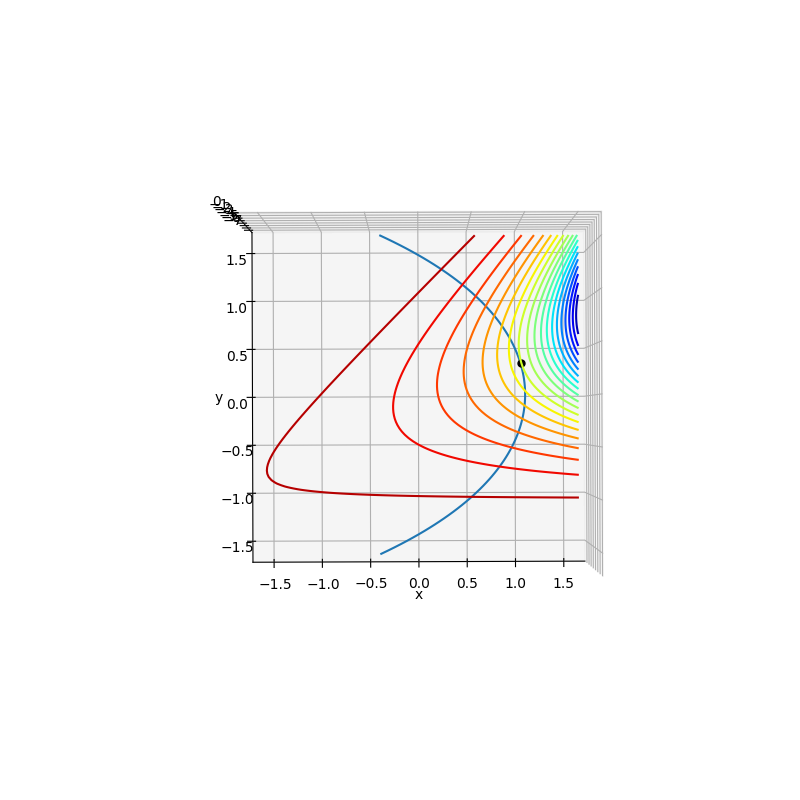

In [79]:
# get the points 
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)

# populate the whole grid 
X, Y = np.meshgrid(x, y)
Z_f = f(X, Y)
Z_g = g(X, Y)
xs = g_x(y)

# plotting the results
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

# drawing the function
#ax.plot_surface(X, Y, Z_f, cmap=cm.binary, alpha=0.5)
ax.plot(xs, y)

cset = ax.contour(X, Y, Z_f, zdir='z', levels=20, offset=0, cmap=cm.jet)
ax.plot([0.958], [0.290], [0.1], marker='o', markersize=5, markeredgecolor='k', markerfacecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [54]:
# Use the definition of DL from previously.
def DL (xyλ) :
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize, linewidth=200)

xmin, xmax = (-1.5,1.5)
ymin, ymax = (-1.5,1.5)
results = []
p_x = xmin
while p_x < xmax:
    p_y = ymin
    while p_y < ymax:
        (x0, y0, λ0) = (p_x, p_y, 0)
        x, y, λ = optimize.root(DL, [x0, y0, λ0]).x
        results.append({'x0':np.round(x0,3), 'y0':np.round(y0,3), 'x':np.round(x,3), 'y':np.round(y,3), 'f(x,y)':np.round(f(x, y),3), 'g(x,y)':np.round(g(x, y),3)})
        p_y += 0.1
    p_x += 0.1
    
df_results = pd.DataFrame(results)
print(df_results["f(x,y)"].nunique())
print(df_results[df_results['g(x,y)'] == 0]["f(x,y)"].unique())
print(df_results[df_results['g(x,y)'] == 0]["f(x,y)"].size)
gb = df_results[df_results['g(x,y)'] == 0].groupby(['x', 'y', 'f(x,y)']).max()
print(gb)

/home/laurent/workspaces/mooke/datasciences/mathematics/math_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/home/laurent/workspaces/mooke/datasciences/mathematics/math_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
/home/laurent/workspaces/mooke/datasciences/mathematics/math_env/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in sinh
/home/laurent/workspaces/mooke/datasciences/mathematics/math_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in cosh
  # Remove the CWD from sys.path while we load stuff.


37
[-0.095 -0.    -3.162]
862
                       x0   y0  g(x,y)
x      y      f(x,y)                  
-3.062  2.305 -0.000 -0.5  0.6    -0.0
-3.028  2.298 -0.000  0.4  1.4    -0.0
-3.024  2.297 -0.000 -0.8  0.7    -0.0
-3.021  2.297 -0.000 -0.2  1.1    -0.0
-3.020  2.296 -0.000 -0.3  1.1    -0.0
...                   ...  ...     ...
-2.905  2.273 -0.000  1.3  1.4    -0.0
-2.894  2.271 -0.000  1.2  1.0    -0.0
-2.891  2.270 -0.000  1.3  1.1    -0.0
-1.171 -1.821 -0.095  1.4  0.2     0.0
 0.958  0.290 -3.162  1.4  1.0     0.0

[84 rows x 3 columns]


In [63]:
# Import libraries
import numpy as np
from scipy import optimize

# First we define the functions, YOU SHOULD IMPLEMENT THESE
def f (x, y) :
    return -np.exp(x - y**2 + x * y)

def g (x, y) :
    return np.cosh(y) + x - 2

# Next their derivatives, YOU SHOULD IMPLEMENT THESE
def dfdx (x, y) :
    return -1 * (1 + y) * f(x,y)

def dfdy (x, y) :
    return -1 * (-2 * y + x) * f(x,y)

def dgdx (x, y) :
    return 1

def dgdy (x, y) :
    return np.sinh(y)

# Use the definition of DL from previously.
def DL (xyλ) :
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

# To score on this question, the code above should set
# the variables x, y, λ, to the values which solve the
# Langrange multiplier problem.

# I.e. use the optimize.root method, as you did previously.

(x0, y0, λ0) = (1.4, 1.0, 0)
x, y, λ = optimize.root(DL, [x0, y0, λ0]).x

print("x = %g" % x)
print("y = %g" % y)
print("λ = %g" % λ)
print("f(x, y) = %g" % np.round(f(x, y),3))

x = 0.957782
y = 0.289565
λ = 4.07789
f(x, y) = -3.162


In [60]:
g_x(0)

1.0